## Context for the problem

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.
He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.
Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.
In this problem you do not have to predict actual price but a price range indicating how high the price is

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


### Load the Training set data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/pratikg17neu/DS_6105__Assignment1/proper-dataset/dataset/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

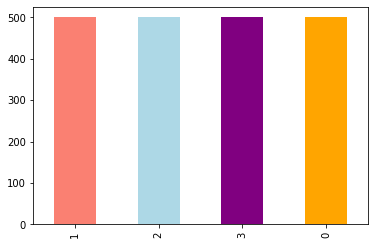

In [4]:
df['price_range'].value_counts().plot(kind='bar', color=['salmon', 'lightblue', 'purple', 'orange']);

##  1.What are the data types? (Only numeric and categorical)

Ans. There are only 2 types of data type in the dataset float64 and int64 both are numeric datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## 2. Are there any missing values in the train data?
Ans. There we no missing values in the data set.

In [6]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## 3. What are the likely distributions of the numeric variables?
Ans. Plotting the histogram from few numerice varibales `battery_power`, `ram` and `int_memory`


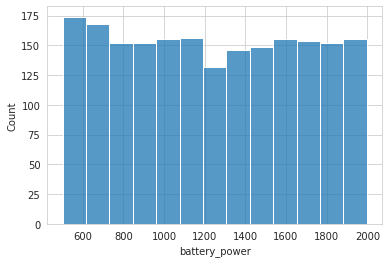

In [7]:
# Plot for Batter Power
sns.set_style('whitegrid')
sns.histplot(df.battery_power); 

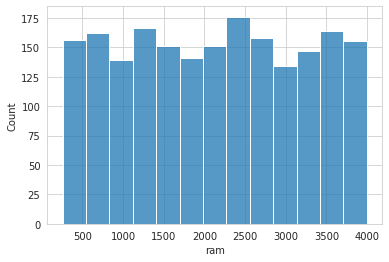

In [8]:
# Plot for Ram
sns.set_style('whitegrid')
sns.histplot(df.ram); 

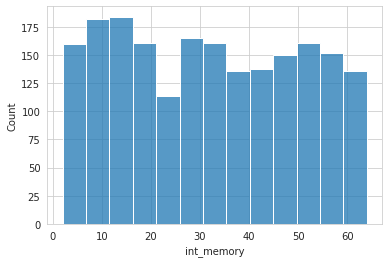

In [9]:
# Plot for Internal Memory
sns.set_style('whitegrid')
sns.histplot(df.int_memory); 

## 4. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)
Ans. To find out which independent variable would be most useful we will use following methods:

* Univariate Selection
* Feature Importance
* Correlation Matrix



### Method 1: Univariate Selection

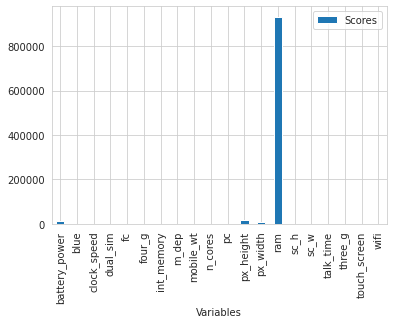

In [10]:
# Import the library
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Create the X_train and y_train
X_train = df.drop("price_range", axis = 1)
y_train = df["price_range"]

#apply the  SelectKBest method to find top 10 best features
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X_train,y_train)

# Dat
data = {'Scores': fit.scores_,
        'Variables': X_train.columns.to_numpy()
       }
  
# Plot the results
df = pd.DataFrame(data,columns=['Scores','Variables',])
df.plot(x ='Variables', y='Scores',  kind = 'bar')
plt.show()

### Conclusion: From the result we see that `ram` is the most significant factor independent variable which affect the price of the mobile phone followed by  `battery_power`, `px_height` and `px_width` 

### Method 2: Feature Importance

In [11]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) # using inbuilt class feature_importances of tree based classifiers

[0.06044885 0.01988023 0.03397346 0.01945726 0.03242235 0.01794118
 0.03524471 0.0338668  0.03714231 0.03443258 0.03477286 0.04726515
 0.04846596 0.38295883 0.03557824 0.03387749 0.03596731 0.01471103
 0.01947846 0.02211494]


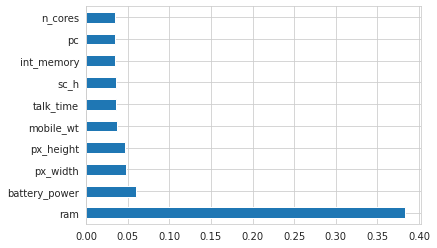

In [12]:
# Plot graph of feature importances 
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Conclusion: From the result we see that `ram` is the most significant factor independent variable which affect the price of the mobile phone followed by  `battery_power`, `px_height` and `px_width` 

### Method 3: Correlation Matrix

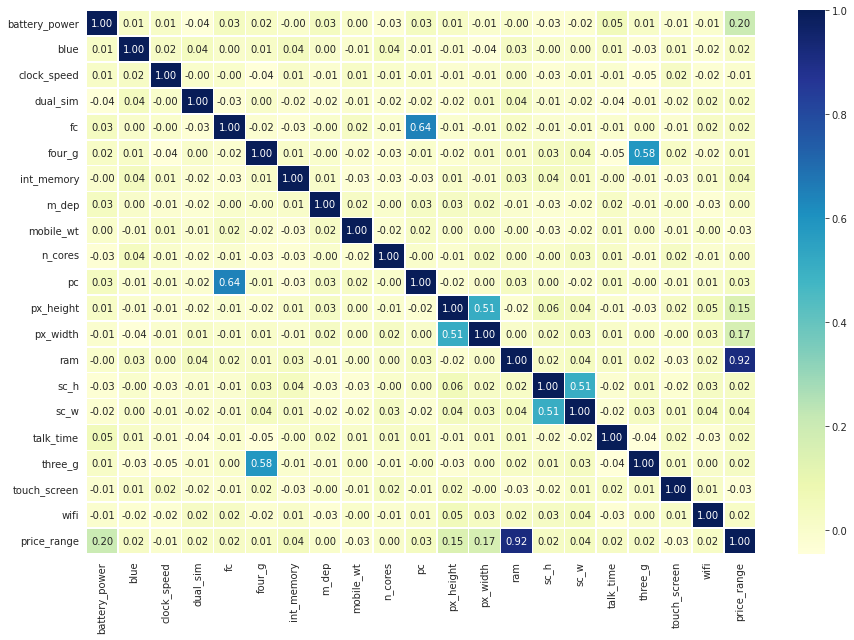

In [13]:
# Creating correaltion matrix on the entire Train dataset
df = pd.read_csv('https://raw.githubusercontent.com/pratikg17neu/DS_6105__Assignment1/proper-dataset/dataset/train.csv')
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu");

### Conclusion: We can see from the correlation matrix `ram` is the most important feature with a score of 0.92

## 5. Which independent variables have missing data? How much? 
Ans. There are no missing data in the independent variables within the train and test data.

Independent variables listed below:
* `battery_power`    
* `blue`     
* `clock_speed`     
* `dual_sim`     
* `fc`     
* `four_g`     
* `int_memory`     
* `m_dep`     
* `mobile_wt`     
* `n_cores`     
* `pc`     
* `px_height `     
* `px_width`     
* `ram`     
* `sc_h`     
* `sc_w`     
* `talk_time `     
* `three_g`     
* `touch_screen`     
* `wifi`


In [14]:
# Check the missing values in the train set
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## 6. Do the training and test sets have the same data?
Ans. Train and test dataset are 2 different CSV files, there are 2000 row in train dataset whereas test has about 1000.

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/pratikg17neu/DS_6105__Assignment1/proper-dataset/dataset/train.csv')

X = df.drop("price_range", axis = 1)
y = df["price_range"]

# Create the X_train and y_train
X_train = df.drop("price_range", axis = 1)
y_train = df["price_range"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
X_train.shape, X_test.shape

((1600, 20), (400, 20))

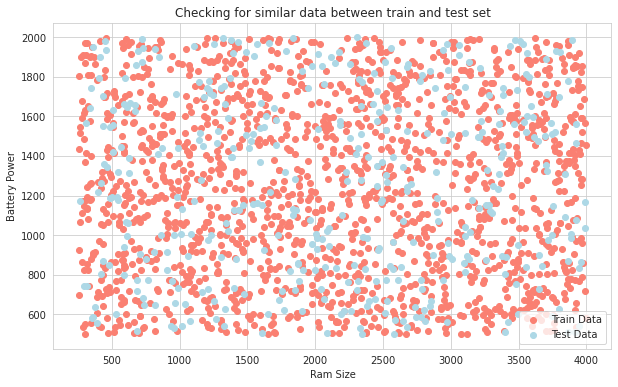

In [16]:

# Scatter plot between test and train data

# Create another figure 
plt.figure(figsize=(10, 6))

# Scatter with the postive examples
plt.scatter(X_train.ram ,
            X_train.battery_power,
            c="salmon")

# Scatter with negitive examples
plt.scatter(X_test.ram,
            X_test.battery_power,
           c="lightblue")

# Add some helpful info
plt.title("Checking for similar data between train and test set")
plt.xlabel("Ram Size")
plt.ylabel("Battery Power")
plt.legend(["Train Data", "Test Data"]);


## 7. In the predictor variables independent of all the other predictor variables?


In [17]:

X_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
59,1063,0,1.4,1,2,1,48,1.0,128,5,4,127,683,2910,15,13,9,1,1,1
1484,1689,1,0.5,0,11,0,9,0.5,150,5,15,467,675,2637,8,4,3,1,0,0
1036,688,0,2.5,1,0,0,57,0.8,131,7,3,426,1964,3745,17,1,4,0,1,0
613,557,1,1.6,0,0,0,24,0.5,125,3,0,1131,1315,1305,12,8,3,1,0,1
945,832,0,1.1,0,0,1,46,0.3,93,6,0,820,1366,3317,8,0,19,1,1,0


In [18]:
# Selecting the top 10 relevant features
pred_var = X_train[['ram', 'battery_power', 'int_memory' ,'px_height', 'px_width', 'mobile_wt','sc_h','sc_w', 'talk_time', 'pc']]
pred_var.head()

,ram,battery_power,int_memory,px_height,px_width,mobile_wt,sc_h,sc_w,talk_time,pc
59,2910,1063,48,127,683,128,15,13,9,4
1484,2637,1689,9,467,675,150,8,4,3,15
1036,3745,688,57,426,1964,131,17,1,4,3
613,1305,557,24,1131,1315,125,12,8,3,0
945,3317,832,46,820,1366,93,8,0,19,0


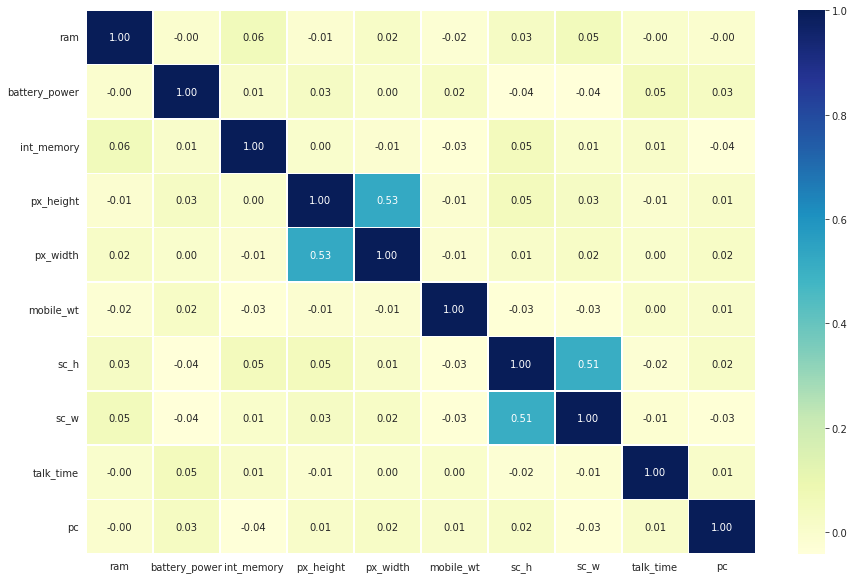

In [19]:
corr_matrix = pred_var.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu");

### Conclusion: Here from the correlation matrix, we can see that none of the variable are highly correlation, only the `px_height`, `px_width`, `sc_` and `sc_w` are correlated and logically they would be related as they are phone dimensions.

## 8. Which predictor variables are the most important?
Ans. We will create RandomForestClassifier and then find out the most important predictor variable.

In [20]:


# Split data into train and test sets
np.random.seed(42)
df = pd.read_csv('https://raw.githubusercontent.com/pratikg17neu/DS_6105__Assignment1/proper-dataset/dataset/train.csv')

X = df.drop("price_range", axis = 1)
y = df["price_range"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [21]:
# Fit an instance of RandomForestClassifier  
clf = RandomForestClassifier()
clf.fit(X_train, y_train);
clf.score(X_test, y_test)


0.8925

In [22]:
# We get accuracy of 89.92% with the RandomForestClassifier
clf.feature_importances_

array([0.07578346, 0.00562716, 0.02729063, 0.00689239, 0.02475708,
       0.00655967, 0.03773306, 0.02415295, 0.03947934, 0.02157999,
       0.02948695, 0.05530035, 0.05722632, 0.48615643, 0.02661565,
       0.02640653, 0.03021725, 0.00614618, 0.00659293, 0.00599567])

In [23]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.feature_importances_)))
feature_dict

{'battery_power': 0.07578345802163748,
 'blue': 0.005627160713035773,
 'clock_speed': 0.027290631705704293,
 'dual_sim': 0.0068923863976345775,
 'fc': 0.02475708243233716,
 'four_g': 0.0065596714860624026,
 'int_memory': 0.037733061530648496,
 'm_dep': 0.024152947327342144,
 'mobile_wt': 0.03947934449970994,
 'n_cores': 0.02157998759286398,
 'pc': 0.029486949357894972,
 'px_height': 0.05530034913571567,
 'px_width': 0.05722632277428072,
 'ram': 0.4861564334995422,
 'sc_h': 0.02661565387487305,
 'sc_w': 0.026406531521902518,
 'talk_time': 0.030217252034676047,
 'three_g': 0.006146176423763108,
 'touch_screen': 0.006592932271784134,
 'wifi': 0.00599566739859143}

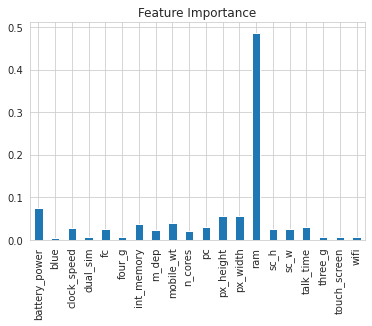

In [24]:
# Visualise feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

### Conclusion: Here we see the `ram` is the most important predictor variable

## 9. Do the ranges of the predictor variables make sense?
Ans. Yes, We have found out that the predictor variable `ram` is a significant factor for mobile phone, Ram are made up of semiconducters which is expensive. Hence, as the cost of the ram goes up the price of the mobile will also go up.

## 10. What are the distributions of the predictor variables?   



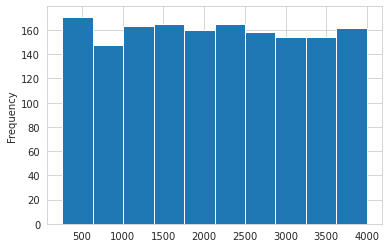

In [25]:
# Check the distribution of the age column with a histogram
X_train.ram.plot.hist();

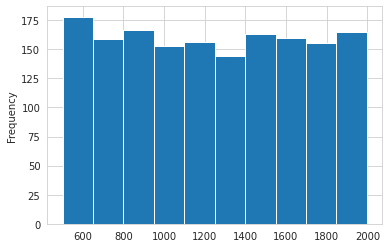

In [26]:
# Check the distribution of the age column with a histogram
X_train.battery_power.plot.hist();

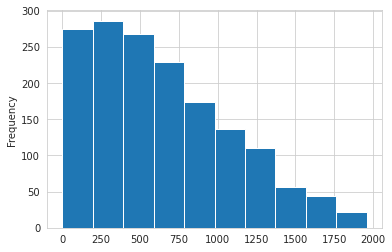

In [27]:
# Check the distribution of the age column with a histogram
X_train.px_height.plot.hist();

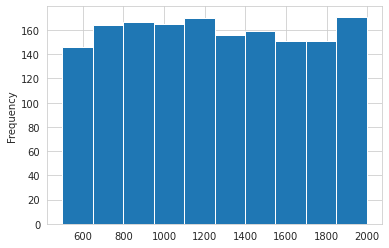

In [28]:
# Check the distribution of the age column with a histogram
X_train.px_width.plot.hist();

## 11. Remove outliers and keep outliers (does if have an effect of the final predictive model)?


### Model with outliers

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Split data into train and test sets
np.random.seed(42)
df = pd.read_csv('https://raw.githubusercontent.com/pratikg17neu/DS_6105__Assignment1/proper-dataset/dataset/train.csv')


X = df.drop("price_range", axis = 1)
y = df["price_range"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

# Fit an instance of RandomForestClassifier  
clf = RandomForestClassifier()
clf.fit(X_train, y_train);
clf.score(X_test, y_test)


0.8925

### Model with outlier get an accuracy score of `89.92%` 

### Finding out the max and min threshold for the outliers on `battery_power`

In [30]:
min_threshold, max_threshold = X.battery_power.quantile([0.001, 0.95])
min_threshold, max_threshold

(501.999, 1930.1499999999999)

In [31]:
df[df.battery_power > max_threshold]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
22,1949,0,2.6,1,4,0,47,0.3,199,4,...,407,822,1433,11,5,20,0,0,1,1
55,1936,0,2.1,1,10,1,46,0.6,104,3,...,667,1036,2552,14,7,13,1,0,0,2
91,1977,1,2.0,1,7,1,54,1.0,171,7,...,1226,1242,1971,18,7,14,1,1,0,2
103,1939,1,2.8,1,0,1,55,0.6,199,4,...,320,520,1047,14,10,18,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,1991,0,2.8,0,3,1,15,0.1,181,1,...,298,1037,1861,8,5,17,1,1,1,1
1913,1969,0,1.2,1,9,0,63,0.2,132,4,...,390,756,298,10,1,10,1,1,0,0
1924,1982,1,1.6,0,2,1,12,0.2,80,5,...,287,593,1824,13,3,14,1,1,1,1
1958,1976,1,2.6,1,6,0,45,1.0,136,4,...,652,1933,2470,11,1,3,0,0,0,3


In [32]:
# Creating dataset without outliers
df_outlier = df[(df.battery_power < max_threshold) & (df.battery_power > min_threshold)]
df_outlier

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,3
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [33]:
# Split data into train and test sets
np.random.seed(42)

X = df_outlier.drop("price_range", axis = 1)
y = df_outlier["price_range"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

# Fit an instance of RandomForestClassifier  
clf = RandomForestClassifier()
clf.fit(X_train, y_train);
clf.score(X_test, y_test)


0.9026315789473685

### Model without outlier get an accuracy score of `90.26%`

### Conclusion: Without the outlier we are getting a higher accuracy


## 12. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error. For categorical data, calculate the accuracy and a confusion matrix.

Ans.We will manually remove some of the data point from the csv file and load into our new dataframe `df_missing_value`.
Then we use the `SimpleImputer` and `ColumnTransformer` method to refill our dataset.

In [34]:
df_missing_value = pd.read_csv('https://raw.githubusercontent.com/pratikg17neu/DS_6105__Assignment1/main/dataset/train.csv')

In [35]:
df_missing_value.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0.0,0.0,1,1
1,1021.0,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1.0,1.0,0,2
2,563.0,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1.0,1.0,0,2
3,615.0,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1.0,0.0,0,2
4,1821.0,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1.0,1.0,0,1


### List of missing values

In [36]:
df_missing_value.isna().sum()

battery_power    23
blue              0
clock_speed       0
dual_sim          0
fc                1
four_g            1
int_memory        1
m_dep             0
mobile_wt         3
n_cores           1
pc                2
px_height         3
px_width          5
ram               4
sc_h              1
sc_w              1
talk_time         0
three_g           1
touch_screen      1
wifi              0
price_range       0
dtype: int64

### Method 1: Using Simple Imputer

In [62]:

# Filling the missing value with imputer
mean_imputer = SimpleImputer(strategy="mean")
median_imputer = SimpleImputer(strategy="median")
constant_imputer = SimpleImputer(strategy="constant", fill_value=1)

# Define columns
mean_features = ["battery_power", "fc", "int_memory", "mobile_wt", "px_height", "px_width", "sc_h", "sc_w"]
median_features = ["n_cores", "pc", "ram"]
constant_features = ["four_g", "three_g","touch_screen"]

imputer = ColumnTransformer([
    ("mean_imputer", mean_imputer, mean_features),
    ("median_imputer", median_imputer, median_features),
    ("constant_imputer", constant_imputer, constant_features)
])

df_imputer = imputer.fit_transform(df_missing_value)

# Get our transformed data array's back into DataFrame's
df_with_imputed_data = pd.DataFrame(df_imputer, columns=[
    "battery_power",
    "fc",
    "int_memory",
    "mobile_wt",
    "px_height",
    "px_width",
    "sc_h",
    "sc_w",
    "n_cores",
    "pc",
    "ram",
 "four_g",
    "three_g",
    "touch_screen"
    ])

df_with_imputed_data

array([[8.420e+02, 1.000e+00, 7.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.021e+03, 0.000e+00, 5.300e+01, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [5.630e+02, 2.000e+00, 4.100e+01, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       ...,
       [1.911e+03, 1.000e+00, 3.600e+01, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [1.512e+03, 4.000e+00, 4.600e+01, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [5.100e+02, 5.000e+00, 4.500e+01, ..., 1.000e+00, 1.000e+00,
        1.000e+00]])

In [38]:
# Check to see the original... still missing values
df_with_imputed_data.isna().sum()

battery_power    0
fc               0
int_memory       0
mobile_wt        0
px_height        0
px_width         0
sc_h             0
sc_w             0
n_cores          0
pc               0
ram              0
four_g           0
three_g          0
touch_screen     0
dtype: int64

### Method 2: Using Pandas method
 

In [39]:
# Loading the missing value data

df_pandas =  pd.read_csv('https://raw.githubusercontent.com/pratikg17neu/DS_6105__Assignment1/main/dataset/train.csv')
df_pandas.isna().sum()

battery_power    23
blue              0
clock_speed       0
dual_sim          0
fc                1
four_g            1
int_memory        1
m_dep             0
mobile_wt         3
n_cores           1
pc                2
px_height         3
px_width          5
ram               4
sc_h              1
sc_w              1
talk_time         0
three_g           1
touch_screen      1
wifi              0
price_range       0
dtype: int64

In [40]:

# Using the pandas inbuilt methods to replace the missing values

df_pandas["fc"] = df_pandas["fc"].fillna(df_pandas["fc"].mean())
df_pandas["int_memory"] = df_pandas["int_memory"].fillna(df_pandas["int_memory"].mean())
df_pandas["mobile_wt"] = df_pandas["mobile_wt"].fillna(df_pandas["mobile_wt"].mean())
df_pandas["px_height"] = df_pandas["px_height"].fillna(df_pandas["px_height"].mean())
df_pandas["px_width"] = df_pandas["px_width"].fillna(df_pandas["px_width"].mean())
df_pandas["sc_h"] = df_pandas["sc_h"].fillna(df_pandas["sc_h"].mean())
df_pandas["sc_w"] = df_pandas["sc_w"].fillna(df_pandas["sc_w"].mean())
df_pandas["n_cores"] = df_pandas["n_cores"].fillna("missing")
df_pandas["pc"] = df_pandas["pc"].fillna(df_pandas["pc"].mode())
df_pandas["ram"] = df_pandas["ram"].fillna(df_pandas["ram"].mean())
df_pandas["battery_power"] = df_pandas["battery_power"].fillna(df_pandas["battery_power"].mean())
df_pandas["three_g"] = df_pandas["three_g"].fillna("missing")
df_pandas["four_g"] = df_pandas["four_g"].fillna(1)
df_pandas["touch_screen"] = df_pandas["touch_screen"].fillna(1)


In [41]:
df_pandas.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               2
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### Method 3: Discarding all missing values

In [43]:
# Loading the missing value data
df_missing =  pd.read_csv('https://raw.githubusercontent.com/pratikg17neu/DS_6105__Assignment1/main/dataset/train.csv')
df_missing.isna().sum()

battery_power    23
blue              0
clock_speed       0
dual_sim          0
fc                1
four_g            1
int_memory        1
m_dep             0
mobile_wt         3
n_cores           1
pc                2
px_height         3
px_width          5
ram               4
sc_h              1
sc_w              1
talk_time         0
three_g           1
touch_screen      1
wifi              0
price_range       0
dtype: int64

In [44]:
df_missing.dropna(inplace=True)


In [45]:
df_missing.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [67]:
# Plot confusion matrix
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(4, 4))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                      fmt='g',
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 

In [71]:
# Creating model on dataset with orignal

# Split data into train and test sets
np.random.seed(42)
df = pd.read_csv('https://raw.githubusercontent.com/pratikg17neu/DS_6105__Assignment1/proper-dataset/dataset/train.csv')
X = df.drop("price_range", axis = 1)
y = df["price_range"]

X_missing =  df_missing.drop("price_range", axis = 1)
y_missing = df_missing['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
X_missing_train, X_missing_test, y_missing_train, y_missing_test = train_test_split(X_missing, y_missing, test_size= 0.2)

# Fit an instance of RandomForestClassifier for orignal dataset
clf = RandomForestClassifier()
clf.fit(X_train, y_train);
y_preds = clf.predict(X_test)
clf.score(X_test, y_test)


0.8825

### The accuracy of model without imputer is `88.25%`

In [72]:
# Fit an instance of RandomForestClassifier with missing dataset
clf_missing = RandomForestClassifier()
clf_missing.fit(X_missing_train, y_missing_train);
y_missing_preds = clf_missing.predict(X_missing_test)
clf_missing.score(X_missing_test, y_missing_test)


0.875

### The accuracy of model with missing data is `85.96%`

# Confusion matrix for Orginal Data set

[[101   4   0   0]
 [  6  76   9   0]
 [  0   8  76   8]
 [  0   0  12 100]]


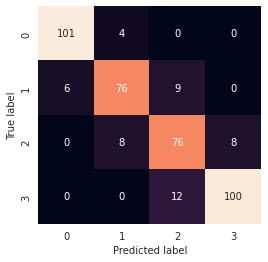

In [73]:
plot_conf_mat(y_test, y_preds)
print(confusion_matrix(y_test, y_preds))

[[89  4  0  0]
 [ 6 80 11  0]
 [ 0 10 86  8]
 [ 0  0 10 88]]


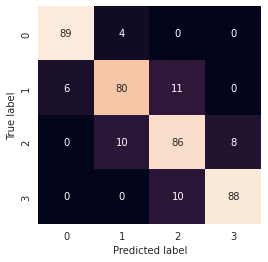

In [74]:
print(confusion_matrix(y_missing_test, y_missing_preds))
plot_conf_mat(y_missing_test, y_missing_preds)

## Here we see that the accuracy decrease for the missing data.

# Conclusion: 
## We find out that, ram is the most significant variable which increases the price of mobile phones. Higher the ram size high is the price range of the mobile phone.

MIT License

 

Copyright (c) 2022 Pratik Gawand

 

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

 

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

 

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

## Reference and Citation

* https://stackoverflow.com/
* https://www.analyticsvidhya.com/